## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [3]:
dataset = pd.read_csv('Bank_Customer_retirement.csv')

In [4]:
dataset.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Customer ID     500 non-null int64
Age             500 non-null float64
401K Savings    500 non-null float64
Retire          500 non-null int64
dtypes: float64(2), int64(2)
memory usage: 15.8 KB


In [6]:
dataset.describe()

,Customer ID,Age,401K Savings,Retire
count,500.000000,500.000000,500.000000,500.000000
mean,249.500000,46.757077,534984.465804,0.500000
std,144.481833,7.790125,187675.818881,0.500501
min,0.000000,25.000000,10.000000,0.000000
25%,124.750000,41.299451,382626.524425,0.000000
50%,249.500000,46.695770,534512.984350,0.500000
75%,374.250000,52.322551,680670.257025,1.000000
max,499.000000,70.000000,1000000.000000,1.000000


## Visualizing the Data

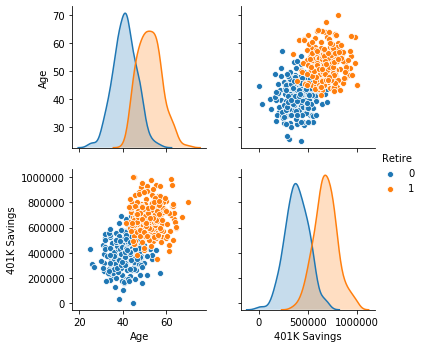

In [19]:
sns.pairplot(dataset, hue='Retire', vars=['Age', '401K Savings'])

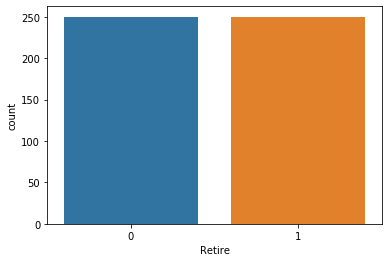

In [8]:
sns.countplot(dataset['Retire'], label='Count')

## Model Training

In [15]:
X = dataset.drop(columns = ['Customer ID','Retire'], axis=1)

In [16]:
y = dataset['Retire']

In [17]:
X

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
...,...,...
495,46.678128,704243.0776
496,43.545007,483175.9998
497,46.476724,354919.1987
498,50.903631,639789.9219


In [18]:
y

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [21]:
X_train.shape

(400, 2)

In [22]:
y_train.shape

(400,)

In [23]:
X_test.shape

(100, 2)

In [24]:
y_test.shape

(100,)

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
svc_model = SVC()

In [27]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Model Testing

In [28]:
y_predict = svc_model.predict(X_test)

In [29]:
y_predict

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [30]:
cm = confusion_matrix(y_test, y_predict)

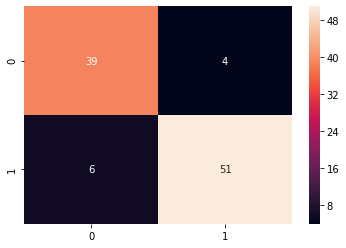

In [31]:
sns.heatmap(cm, annot=True)

In [32]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        43
           1       0.93      0.89      0.91        57

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



## Improving the model

In [33]:
min_train = X_train.min()

In [34]:
range_train = (X_train - min_train).max()

In [35]:
X_train_scaled = (X_train - min_train)/range_train

In [36]:
X_train_scaled

,Age,401K Savings
247,0.488640,0.684860
390,0.731713,0.651642
186,0.636117,0.669911
484,0.544773,0.718011
139,0.455655,0.363796
...,...,...
486,0.315494,0.033828
189,0.281290,0.374391
495,0.512265,0.704240
206,0.510404,0.626791


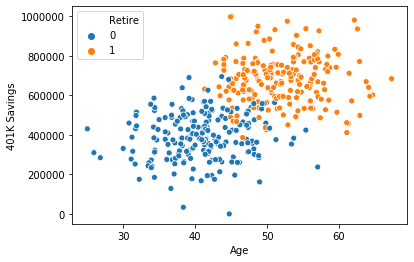

In [64]:
sns.scatterplot(x= X_train['Age'], y=X_train['401K Savings'], hue=y_train)

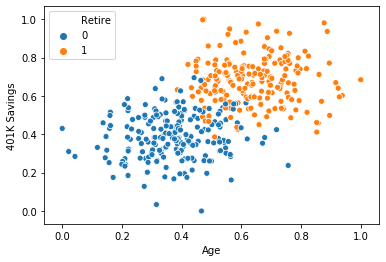

In [65]:
sns.scatterplot(x= X_train_scaled['Age'], y=X_train_scaled['401K Savings'], hue=y_train)

In [38]:
min_test = X_test.min()

In [39]:
range_test = (X_test - min_test).max()

In [40]:
X_test_scaled = (X_test - min_test)/range_test

In [41]:
X_test_scaled

,Age,401K Savings
241,0.267183,0.094430
448,0.165409,0.505061
75,0.139272,0.302988
212,0.248950,0.550203
481,0.323557,0.677682
...,...,...
145,0.633436,0.635622
234,0.612141,0.525418
382,0.444550,0.850610
141,0.538401,0.412874


In [42]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
y_predict = svc_model.predict(X_test_scaled)

In [44]:
cm = confusion_matrix(y_test, y_predict)

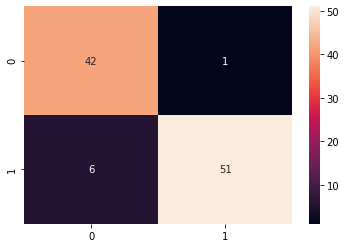

In [45]:
sns.heatmap(cm, annot=True)

In [46]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.89      0.94        57

    accuracy                           0.93       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100



## Grid Search

In [48]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)

In [51]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.938, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.975, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.963, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.912, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.950, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.512, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.525, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.512, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.537, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.525, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.512, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.512, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.512, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [52]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [60]:
grid_predict = grid.predict(X_test_scaled)

In [61]:
cm = confusion_matrix(y_test, grid_predict)

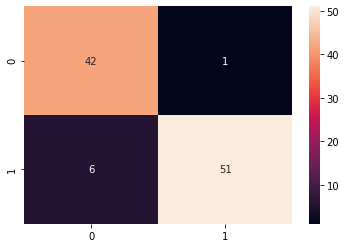

In [62]:
sns.heatmap(cm, annot=True)

In [63]:
print(classification_report(y_test, grid_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.89      0.94        57

    accuracy                           0.93       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100

